In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import acq_census
import transform

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

In [2]:
df = pd.read_csv('fcc_median_income.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,population,id,objectid,place,block2000,tract,blockgroup,block,gecovector,PointOrder,SubPolygonId,PointLatitude,PointLongitude,pcat_all,pcat_10x1,GEO.id,GEO.display-label,HD01_VD01,HD02_VD01
0,0,37,51387,75,NaN,480291620021043,48029162004,480291620041,480291620041039,0.310642,1,1,29.2424,-98.7798,2,1,1500000US480291620041,"Block Group 1, Census Tract 1620.04, Bexar Cou...",47542,26734
1,1,37,51387,75,NaN,480291620021043,48029162004,480291620041,480291620041039,0.310642,2,1,29.2645,-98.7346,2,1,1500000US480291620041,"Block Group 1, Census Tract 1620.04, Bexar Cou...",47542,26734
2,2,37,51387,75,NaN,480291620021043,48029162004,480291620041,480291620041039,0.310642,3,1,29.2714,-98.7272,2,1,1500000US480291620041,"Block Group 1, Census Tract 1620.04, Bexar Cou...",47542,26734
3,3,37,51387,75,NaN,480291620021043,48029162004,480291620041,480291620041039,0.310642,4,1,29.2726,-98.7233,2,1,1500000US480291620041,"Block Group 1, Census Tract 1620.04, Bexar Cou...",47542,26734
4,4,37,51387,75,NaN,480291620021043,48029162004,480291620041,480291620041039,0.310642,5,1,29.2804,-98.7168,2,1,1500000US480291620041,"Block Group 1, Census Tract 1620.04, Bexar Cou...",47542,26734


In [4]:
df_explore = df[['blockgroup','pcat_all', 'pcat_10x1', 'HD01_VD01', 'HD02_VD01', 'population']]

In [5]:
df_explore.head()

,blockgroup,pcat_all,pcat_10x1,HD01_VD01,HD02_VD01,population
0,480291620041,2,1,47542,26734,37
1,480291620041,2,1,47542,26734,37
2,480291620041,2,1,47542,26734,37
3,480291620041,2,1,47542,26734,37
4,480291620041,2,1,47542,26734,37


In [6]:
df_explore = df_explore.replace('-',np.nan)

In [7]:
df_explore['HD01_VD01'] = df_explore['HD01_VD01'].replace('250,000+','250000')

In [8]:
df_explore = df_explore.replace(',','')

In [9]:
df_explore['HD01_VD01'] = df_explore['HD01_VD01'].dropna().astype(int)

In [11]:
df_explore = df_explore.replace('**',np.nan)

In [13]:
df_explore = df_explore.replace('***',np.nan)

In [14]:
df_explore['HD02_VD01'] = df_explore['HD02_VD01'].dropna().astype(int)

In [16]:
df_explore.sort_values('blockgroup', ascending=True).head()

,blockgroup,pcat_all,pcat_10x1,HD01_VD01,HD02_VD01,population
311826,480291101001,5,4,31314.0,6474.0,169
311751,480291101001,5,4,31314.0,6474.0,0
311752,480291101001,5,4,31314.0,6474.0,0
311753,480291101001,5,4,31314.0,6474.0,0
311754,480291101001,5,4,31314.0,6474.0,0


In [17]:
df_explore = df_explore.drop(['population'], axis=1)

In [19]:
fcc_median_income_agg = df_explore.groupby(['blockgroup']).mean()

In [21]:
fcc_median_income_agg.head(10)

,pcat_all,pcat_10x1,HD01_VD01,HD02_VD01
blockgroup,,,,
480291101001,5,4,31314.0,6474.0
480291101002,5,4,45655.0,6781.0
480291101003,5,4,47988.0,17879.0
480291103001,3,2,25104.0,20858.0
480291103002,3,2,37146.0,10862.0
480291103003,3,2,36324.0,10167.0
480291105001,3,3,11922.0,3488.0
480291106001,2,2,40462.0,26162.0
480291106002,2,2,11899.0,2082.0


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


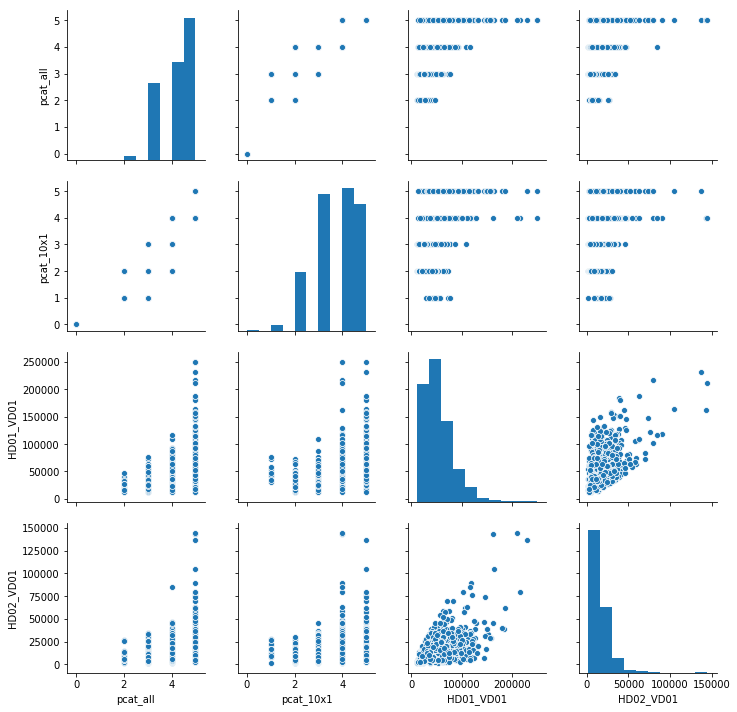

In [22]:
sns.pairplot(fcc_median_income_agg)